In [1]:
import time
from collections import defaultdict

import numpy as np

In [2]:
class RBF_network(object):

    def __init__(self, gamma=0.1):
        self.gamma = gamma

    def train(self, X, y, centers=[], num_centers=10, lamb=0, gamma=None):
        print("Start training...")
        start = time.clock()

        if len(centers) == 0:
            self.centers = self.kmeans(X, num_centers)
        else:
            self.centers = centers

        if gamma:
            self.gamma = gamma

        Z = np.array([[self.RBF(x, c) for c in self.centers] for x in X])
        mat = Z.T.dot(Z) + np.identity(len(self.centers)) * lamb
        inv_mat = np.linalg.inv(mat)
        self.beta = inv_mat.dot(Z.T).dot(y)
        self.mse = np.mean((Z.dot(self.beta) - y)**2)

        print('\tMean squared error: %.4f' % self.mse)
        print('Using %.4f seconds.' % (time.clock() - start))

    def predict(self, X_test):
        rbf_mat = [[self.RBF(xt, c) for c in self.centers] for xt in X_test]
        Zt = np.array(rbf_mat)
        return Zt.dot(self.beta)

    def RBF(self, x, c):
        return np.exp(-self.gamma * np.sum((x - c)**2))

    def kmeans(self, X, num_centers):
        start = time.clock()
        centers = X[np.random.choice(X.shape[0], num_centers, replace=False)]
        clusters = []

        while True:
            new_clusters = []
            for i in range(X.shape[0]):
                distances = [np.sum((X[i] - c)**2) for c in centers]
                new_clusters.append(distances.index(min(distances)))

            if new_clusters == clusters:
                break

            clusters = new_clusters

            collect = defaultdict(list)
            for ind, clus in enumerate(clusters):
                collect[clus].append(X[ind])

            for clus, values in collect.items():
                centers[clus] = np.mean(values, axis=0)

        self.clusters = clusters
        print('\tFinished finding centers.')

        return centers


In [3]:
model = RBF_network()
X, y = np.random.random((10000, 2)), np.random.rand(10000)
model.train(X, y)

Start training...
	Finished finding centers.
	Mean squared error: 0.0855
Using 39.2175 seconds.


In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt

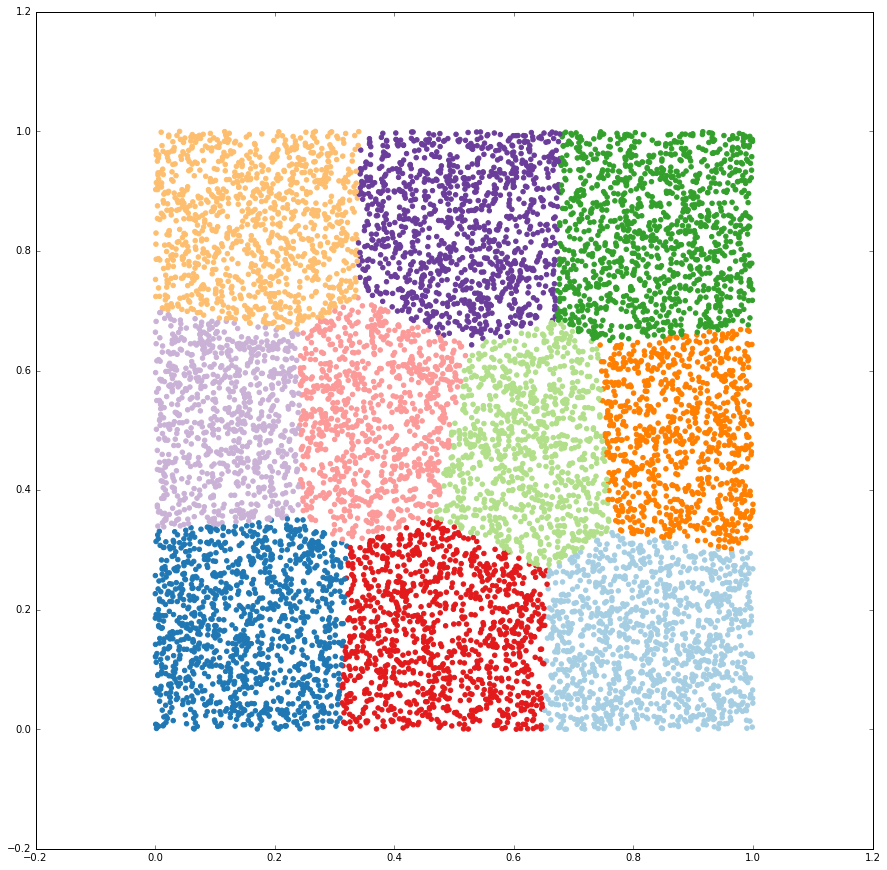

In [5]:
plt.figure(figsize=(15, 15))
colors = np.array(['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
                   '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a'])

plt.scatter(X[:, 0], X[:, 1], color=colors[model.clusters])